<a href="https://colab.research.google.com/github/Rajikshank/ML_files/blob/main/multiple_linear_regression_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df=pd.read_csv( "https://github.com/krishnaik06/Complete-Machine-Learning-2023/blob/main/economic_index.csv?raw=true")
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [28]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [29]:
#drop unneccessary column
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [30]:
df.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [31]:
##check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

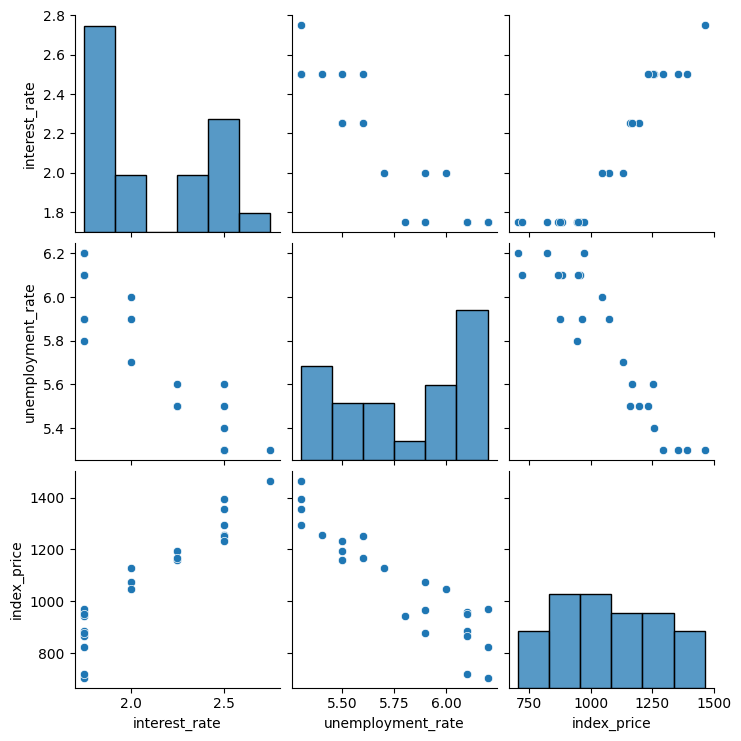

In [32]:
import seaborn as sns
sns.pairplot(df)

In [33]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

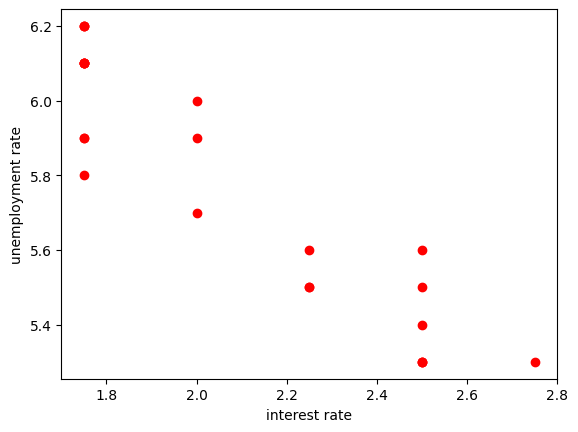

In [34]:
##visualize data points
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [35]:
#independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [36]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

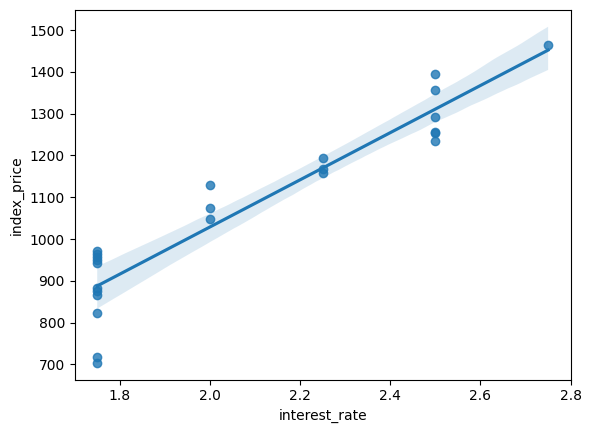

In [37]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

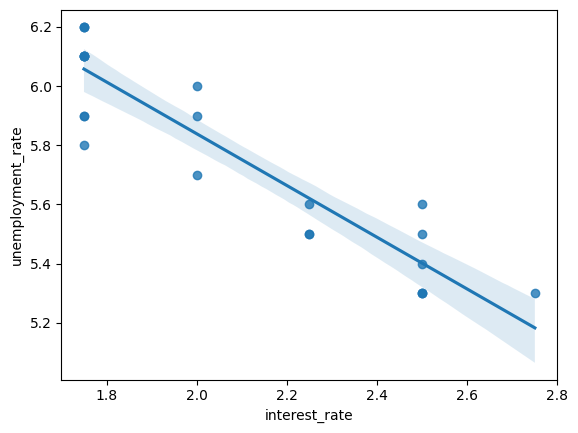

In [38]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [41]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [42]:
#performing cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [43]:
np.mean(validation_score)

-5914.828180162386

In [44]:
y_pred=regression.predict(x_test)

In [45]:
y_pred


array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [46]:
#performance merics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5793.762887712569
59.935781523235484
76.11677139574805


In [48]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [49]:
#display adjused r2 score
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7131630152428576

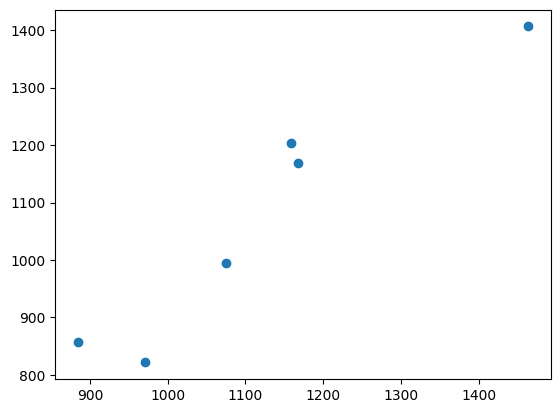

In [50]:
plt.scatter(y_test,y_pred)

In [52]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

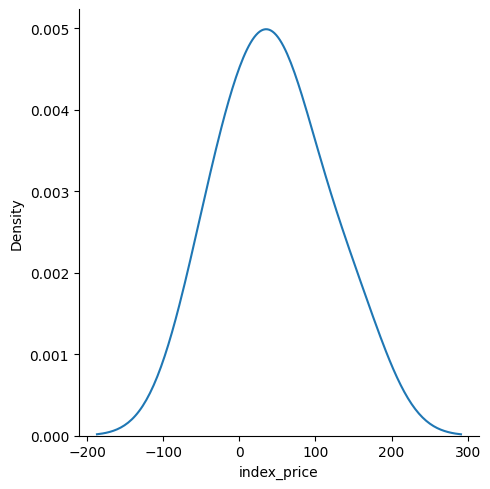

In [53]:
#plot this residuals
sns.displot(residuals,kind='kde')

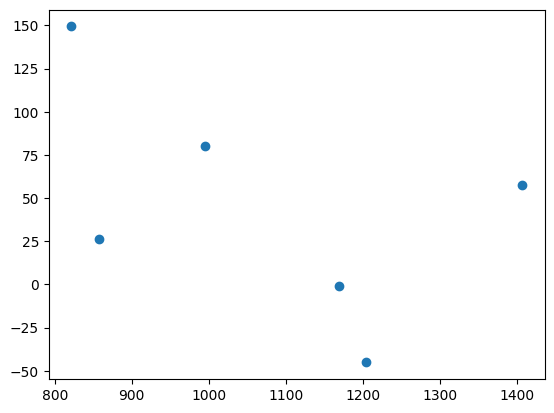

In [54]:
#scatter plot with prediction and residuals
plt.scatter(y_pred,residuals)

In [55]:
## ols Linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 18 May 2024   Prob (F-statistic):                       0.754
Time:                        17:52:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
print(regression.coef_)

[  88.27275507 -116.25716066]
